# Introduction

Over the past 3 years, students around the world have been forced to take on virtual classes due to strict COVID-19 restrictions. However, some students are able to adapt to the virtual classroom better than others.

__What factors affect a Student's flexibility towards online learning?__

In this project, we will predict the outcome of Students' flexibility towards online learning through machine learning based on different factors such as education level, location, and financial conditions.


# Setting up / Importing Libraries
The below code contains necessary steps for setting up our machine learning environment. Key features are described in the comments.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # for data visualisation purposes
from matplotlib.colors import ListedColormap # Colors!
from sklearn.tree import DecisionTreeClassifier ,plot_tree # One of our models and a handy tool for visualising trees
from sklearn.metrics import accuracy_score # Used for scoring our model
import seaborn as sns # A nice data visualisation tool I found online
from sklearn.preprocessing import LabelEncoder # Used for encoding our data
from sklearn.model_selection import train_test_split # Used for splitting data
from sklearn import tree # Plotting
from sklearn.model_selection import GridSearchCV #Hyperparameter Tuning
from sklearn.metrics import confusion_matrix #For Evaluating Decision Tree/Random Forest Model





# Gather and explore the data

The imported data we have shows a certain student's flexibility towards online education based on a number of different factors such as education level, location, and financial conditions. See below for the first 5 rows of the data

In [ ]:
data = pd.read_csv('/content/students_adaptability_level_online_education.csv')

data.head()
#data.info()
#data.describe()

,Education Level,Institution Type,Gender,Age,Device,IT Student,Location,Financial Condition,Internet Type,Network Type,Flexibility Level
0,University,Private,Male,23,Tab,No,Town,Mid,Wifi,4G,Moderate
1,University,Private,Female,23,Mobile,No,Town,Mid,Mobile Data,4G,Moderate
2,College,Public,Female,18,Mobile,No,Town,Mid,Wifi,4G,Moderate
3,School,Private,Female,11,Mobile,No,Town,Mid,Mobile Data,4G,Moderate
4,School,Private,Female,18,Mobile,No,Town,Poor,Mobile Data,3G,Low


## Visualise the data
Now that we have our data in a dataframe it might help to visualize the data. This will allow us to:
* Identify patterns and trends.
* Decide which features are important.
* Predict which models are most likely to make accurate predictions.


<ipython-input-3-6cf4fb2b5e5f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = data[c], y = data[target], ax=axes[i],palette = 'rainbow')
<ipython-input-3-6cf4fb2b5e5f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = data[c], y = data[target], ax=axes[i],palette = 'rainbow')
<ipython-input-3-6cf4fb2b5e5f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = data[c], y = data[target], ax=axes[i],palette = 'rainbow')
<ipython-input-3-6cf4fb2b5e5f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wil

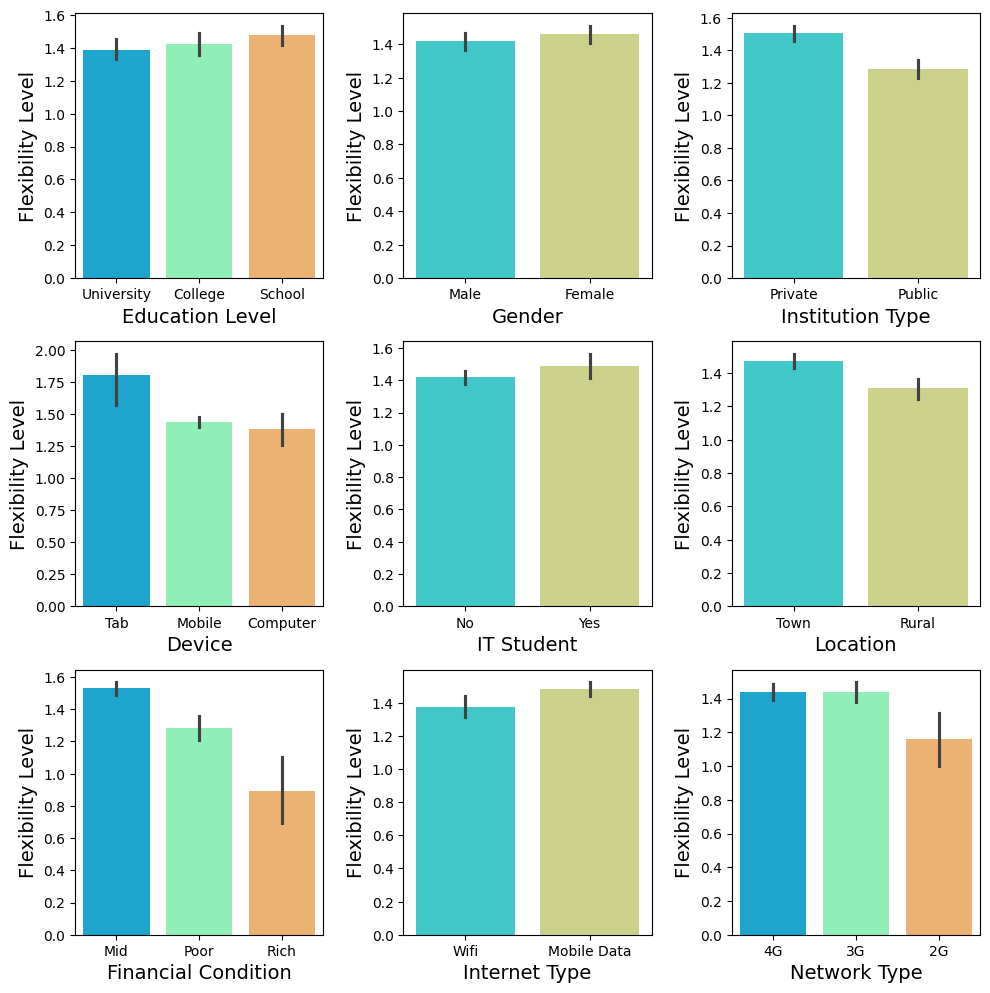

In [ ]:
enc = LabelEncoder()
FlexibilityLevel = enc.fit_transform(data['Flexibility Level'])
data['Flexibility Level'] = FlexibilityLevel

categorical_features = ['Education Level','Gender','Institution Type','Device','IT Student','Location','Financial Condition','Internet Type','Network Type']

fig, axes = plt.subplots(3, 3, figsize=(10,10))
axes = [ax for axes_row in axes for ax in axes_row]
target = 'Flexibility Level'

for i, c in enumerate(categorical_features):
    sns.barplot(x = data[c], y = data[target], ax=axes[i],palette = 'rainbow')
    axes[i].set_ylabel('Flexibility Level', fontsize=14)
    axes[i].set_xlabel(c, fontsize=14)


plt.tight_layout()
plt.show()

## Interpret what you see
__Wow!__ Those are some colourful insights! It seems like there are indeed some factors that affect a student's flexibility in online learning!

However, there are also some factors that dont seem to affect a student's flexibility towards online learning. We should drop these columns as they will not be helpful for our model (such as Gender)

Since nearly all of our data is categorical and since we are doing a classification prediction, we will be using the Decision Tree and the Random Forest machine learning model.

# Preparing the Data
In this example, we want to predict how flexible a student is towards online learning. Therefore the 'Flexibility Level' column is our prediction target.

Before we can separate our prediction target 'y' from the rest of the data, we need to do some preparation so that there aren't any rows with missing values as our machine learning model will not be able to handle them.

## Select features and target then drop missing values
Choosing our features first will help reduce the total number of rows we need to drop (remove).

We want to choose a selection of features that are:
- Relevant to our predictions
- Don't have many missing values

Note that we'll also be including the target for now. This is because if we drop a row then we must also drop the associated target value otherwise we will end up with X and y having a different number of rows.

In [ ]:
selected_columns = ['IT Student', 'Institution Type', 'Device', 'Financial Condition', 'Internet Type', 'Network Type', 'Location', 'Flexibility Level']

prepared_data = data[selected_columns]

prepared_data = prepared_data.dropna(axis=0)


prepared_data.describe(include='all')

,IT Student,Institution Type,Device,Financial Condition,Internet Type,Network Type,Location,Flexibility Level
count,1205,1205,1205,1205,1205,1205,1205,1205.000000
unique,2,2,3,3,2,3,2,NaN
top,No,Private,Mobile,Mid,Mobile Data,4G,Town,NaN
freq,901,823,1013,878,695,775,935,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.435685
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.642013
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000


## Encoding the Data
One of the difficulties of working with machine learning models is that most of them can only work with numerical features. One problem with our current data is that 'Male' is categorical, with values of either _male_ or _female_ which are not numbers!

Since all the data we are using is categorical, we will encode all of them.
Keep in mind that some of the categories are not binary (such as Education Level), hence why the number 2 appears as a number occasionally.


In [ ]:
#Gender = enc.fit_transform(prepared_data['Gender'])
InstitutionType = enc.fit_transform(prepared_data['Institution Type'])
Device = enc.fit_transform(prepared_data['Device'])
ITStudent= enc.fit_transform(prepared_data['IT Student'])
Location = enc.fit_transform(prepared_data['Location'])
FinancialCondition = enc.fit_transform(prepared_data['Financial Condition'])
InternetType = enc.fit_transform(prepared_data['Internet Type'])
NetworkType = enc.fit_transform(prepared_data['Network Type'])
#prepared_data['Gender'] = Gender
prepared_data['Institution Type'] = InstitutionType
prepared_data['Device'] = Device
prepared_data['IT Student'] = ITStudent
prepared_data['Location'] = Location
prepared_data['Financial Condition'] = FinancialCondition
prepared_data['Internet Type'] = InternetType
prepared_data['Network Type'] = NetworkType

prepared_data.head()

,IT Student,Institution Type,Device,Financial Condition,Internet Type,Network Type,Location,Flexibility Level
0,0,0,2,0,1,2,1,2
1,0,0,1,0,0,2,1,2
2,0,1,1,0,1,2,1,2
3,0,0,1,0,0,2,1,2
4,0,0,1,1,0,1,1,1


## Separate Features From Target
Now that we have a set of data (as a Pandas DataFrame) without any missing values, let's separate the features we will use for training from the prediction target by dropping it.



In [ ]:
X = prepared_data.drop('Flexibility Level', axis=1)

#X.head()

y = prepared_data['Flexibility Level']

#y.head()

## Split Data Into Training and Testing Data
Splitting the training set into two subsets is important because you need to have data that your model hasn't seen yet with actual values to compare to your predictions to be able to tell how well it is performing.


In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size = 0.3,random_state=42)

# Choose and Train a Model
Now that we have data our model can digest, let's use it to train a model and make some predictions. We're going to use a __Decision Tree Classifier__ and a __Random Forest Classifier__ since we are working with categorical data (which has been encoded)

In this case, the category we want to predict is how well a student can adapt to online learning, with the output being a 2 if they highly flexible, 1 if they are flexible, and a 0 if they are not flexible. Decision Tree Classifiers are also able to work with non-numerical prediction targets as well. For example, you might have a 'y' that contains the names (as strings) of different species of flowers. It's only features that need to be encoded.


Ok, let's train our model and see what it looks like.

__Note:__ Visualizing the model is an optional step. Depending on the model it might not make sense to do this.

# Decision Tree Classifier

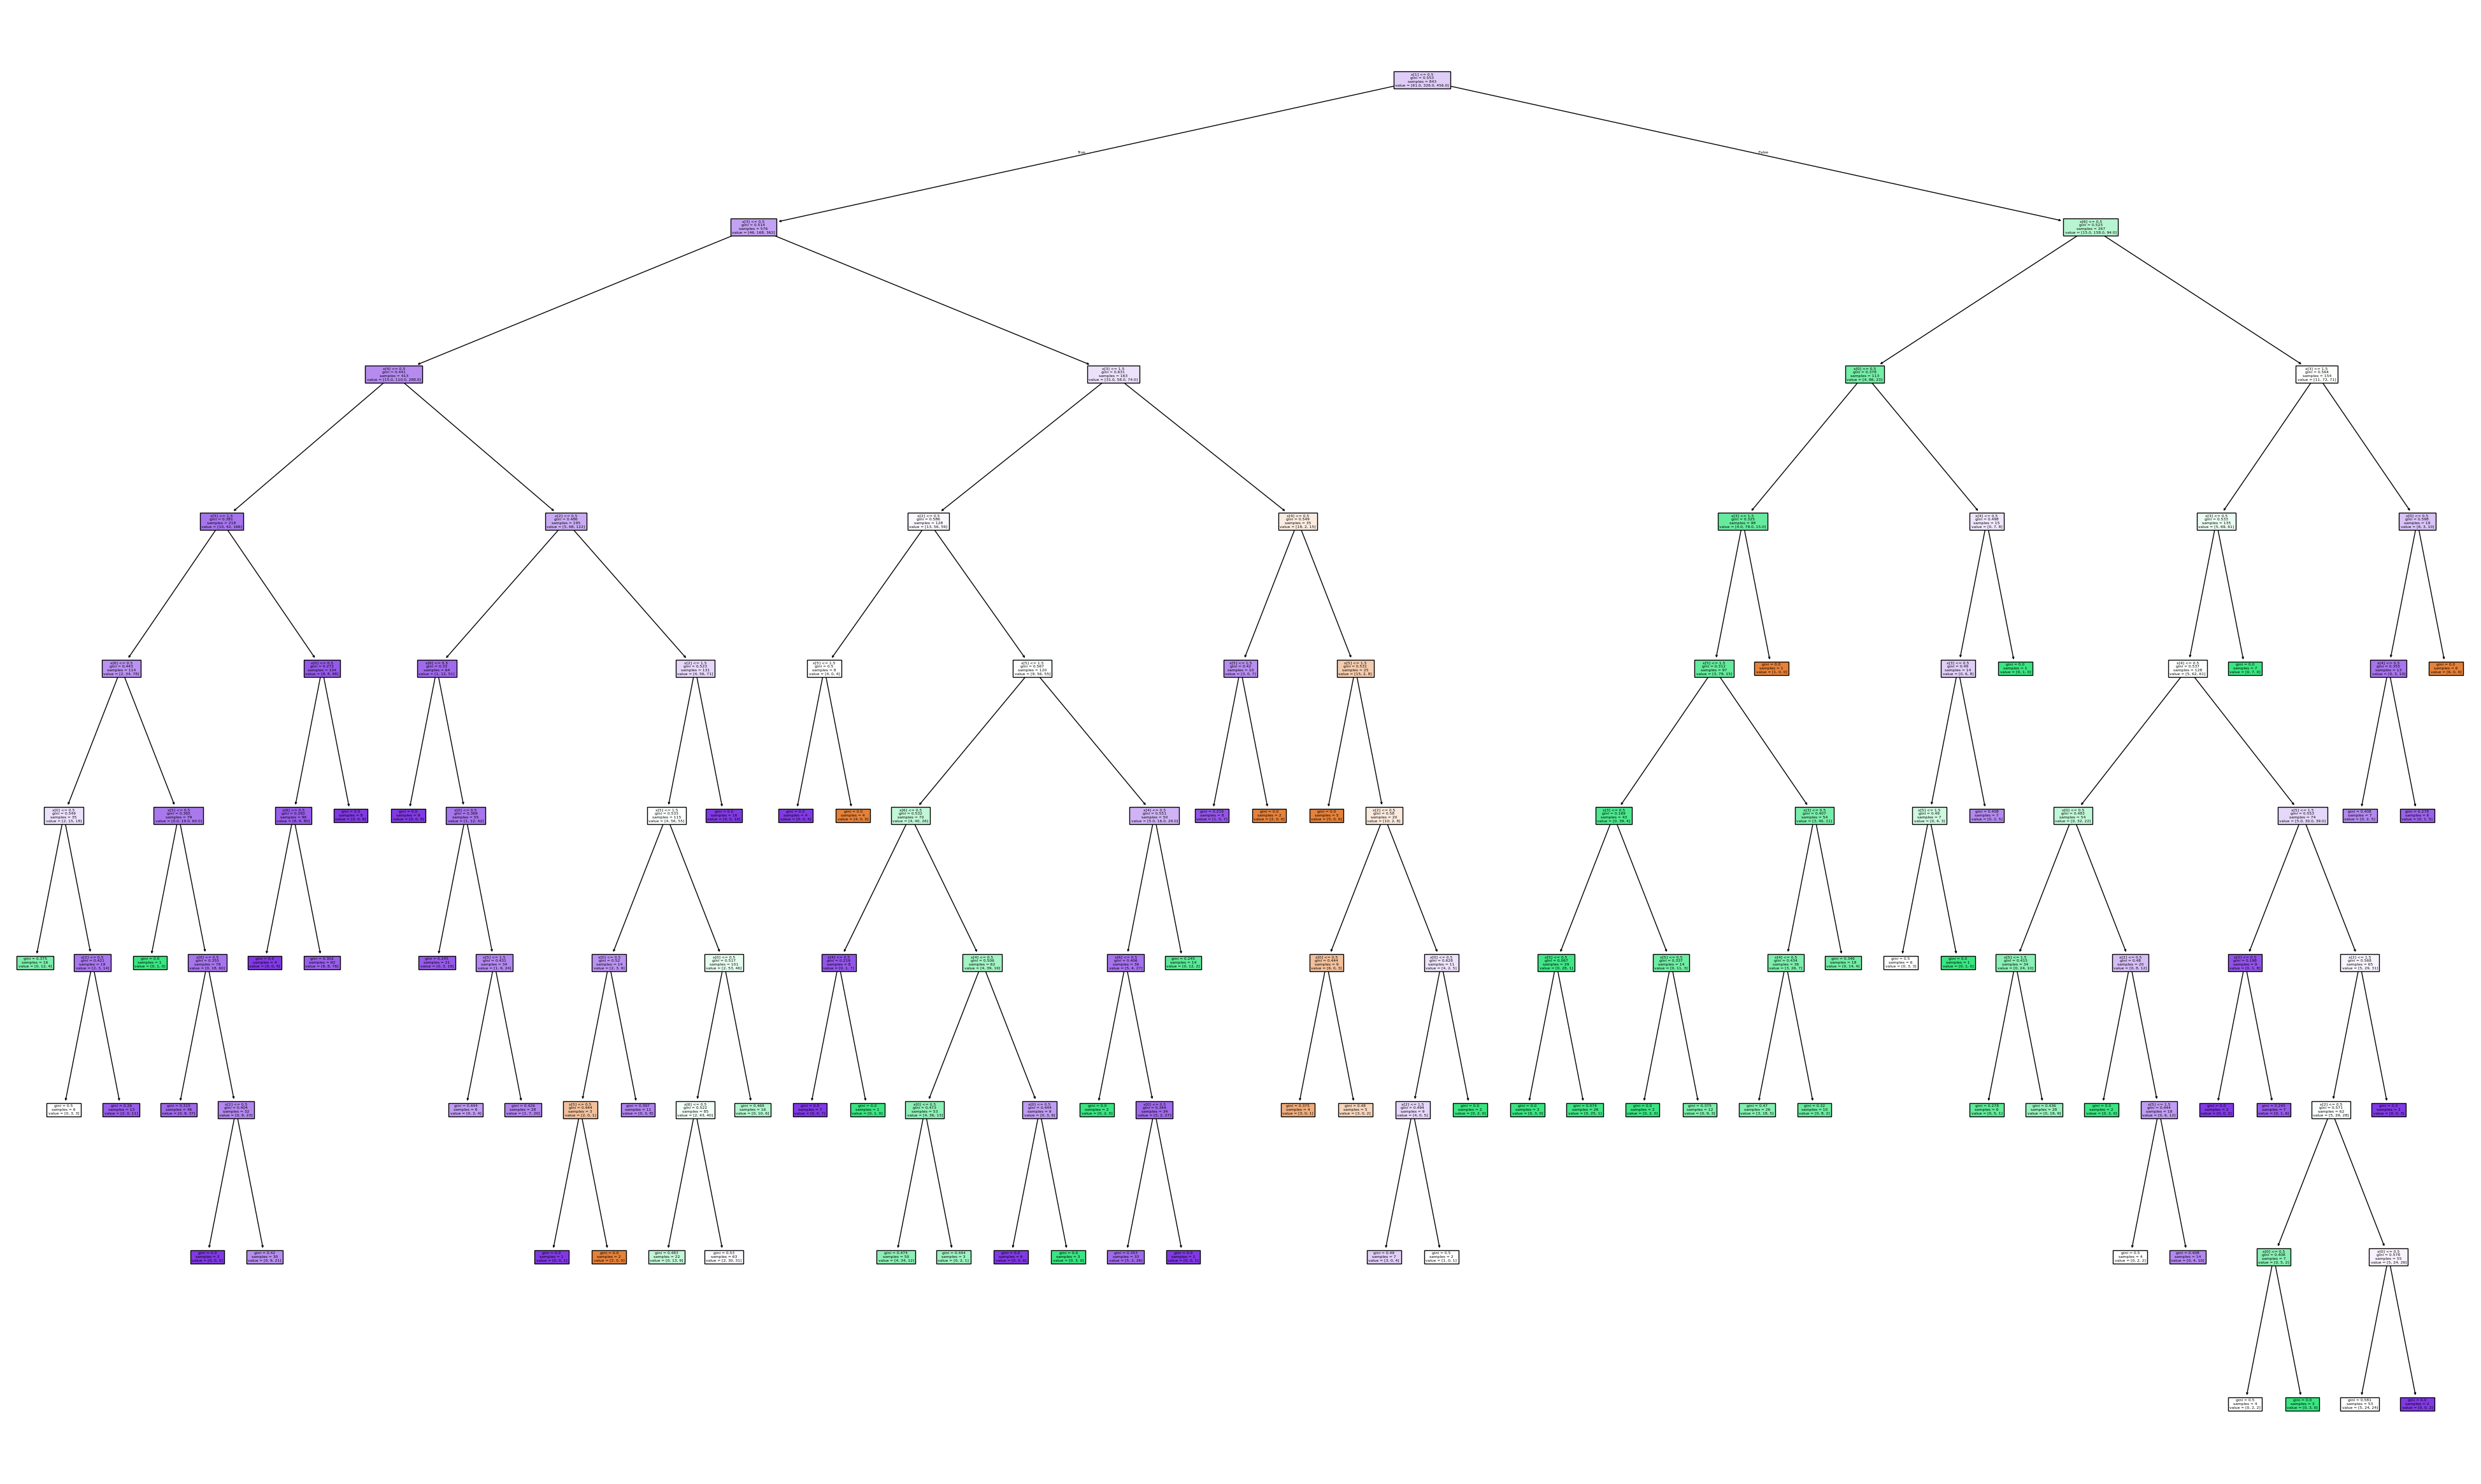

In [ ]:
# Create a decision tree classifier with a maximum depth of 3 for easy display later on
# Try changing the max_depth to see what happens
FlexibilityPredictor = DecisionTreeClassifier(max_depth=20)

# Train the model on the one hot encoded data
FlexibilityPredictor.fit(X_train, y_train)

# Let's plot the tree to see what it looks like!
plt.figure(figsize=(50,30))
tree.plot_tree(FlexibilityPredictor,filled=True)

plt.show()


Wow thats a cool looking decision tree!

# Random Forest Classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier
FlexibilityPredictor2 = RandomForestClassifier(n_estimators = 4)

FlexibilityPredictor2.fit(X_train ,y_train)


RandomForestClassifier(n_estimators=4)

Unfortunately, you cannot plot/visualize the entire Random Forest without plotting every individual decision tree within it.



# Evaluate Performance
Now that we have a sweet looking model, let's see how good it is at predicting student virtual learning flexibility on our training set.

In [ ]:
#print("Making predictions for the first 5 passengers in the training set.")


y_pred = FlexibilityPredictor.predict(X_test)

y_pred2 = FlexibilityPredictor2.predict(X_test)



ac_dt = accuracy_score(y_test,y_pred)
ac_rf = accuracy_score(y_test, y_pred2)

print("Decision Tree Accuracy: {:.3f}".format(ac_dt))

print("Random Forest Test accuracy: {:.3f}".format(ac_rf))

Decision Tree Accuracy: 0.702
Random Forest Test accuracy: 0.702


Our predictions are decent... but what adjustments can we make to make these predictions even better?

# Tune Hyperparameters and Make Final Predictions

We want to find the optimal parameters for our Classification models so that we can maximize our accuracy. We will do this by utilizing GridSearchCV.

Setting the Parameter values

I wasn't able to set the parameters for the Random Forest classifier with too high a range because it would take a very long time for it to iterate through all of them.

In [ ]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']

}

params2 = {
    'n_estimators': range(2, 20),
    'max_features': [5, 10],
    'max_depth': [10, 50, None],
    'bootstrap': [True, False]

}


Tuning

In [ ]:
grid_search = GridSearchCV(estimator=FlexibilityPredictor,
                     param_grid=params,
                     cv=5,
                    n_jobs =2, verbose=1)
grid_search.fit(X_train,y_train)

best_parameters = grid_search.best_params_
print(best_parameters)

Fitting 5 folds for each of 5184 candidates, totalling 25920 fits
{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [ ]:
grid_search2 = GridSearchCV(estimator=FlexibilityPredictor2,
                     param_grid=params2,
                     cv=5,
                    n_jobs =2, verbose=1)
grid_search2.fit(X_train,y_train)

best_parameters2 = grid_search2.best_params_
print(best_parameters2)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
{'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 4}


In [ ]:
print("Test accuracy: {:.3f}".format(grid_search.best_score_))

print("Test accuracy: {:.3f}".format(grid_search2.best_score_))



Test accuracy: 0.707
Test accuracy: 0.720


These accuracy scores are better than the scores from before hyperparameter tuning. Let's use them.

In [ ]:
improvedPredictor = DecisionTreeClassifier(criterion = 'gini', max_depth = 8, min_samples_leaf= 1, min_samples_split= 2, splitter ='random')
improvedPredictor.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, splitter='random')

In [ ]:
improvedPredictor2 = RandomForestClassifier(bootstrap = True, max_depth = None, max_features= 5, min_samples_split= 2, n_estimators =14) # Changed bootstrap='True' to bootstrap=True
improvedPredictor2.fit(X_train,y_train)

RandomForestClassifier(max_features=5, n_estimators=14)

# Evaluating The Models Through Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree')

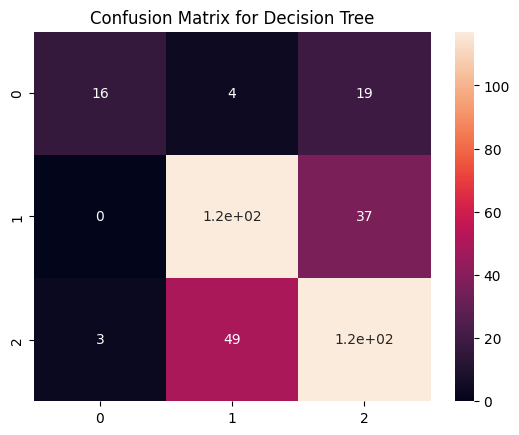

In [ ]:
y_newpred = improvedPredictor.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_newpred)
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Decision Tree")

Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

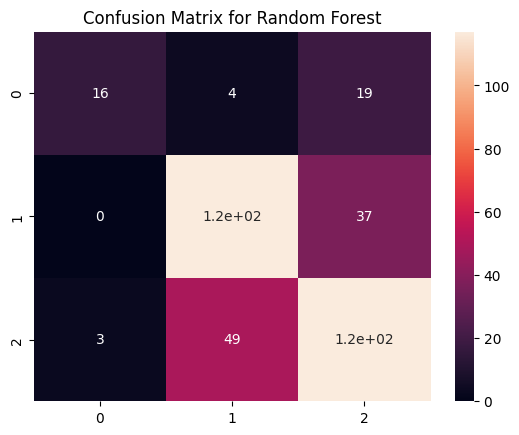

In [ ]:
y_newpred2 = improvedPredictor2.predict(X_test)
cf_matrix2 = confusion_matrix(y_test, y_newpred2)
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest")

# Discussion
These 2 confusion matrices help visualize how well our 2 models performed. It seems like the 2 confusion matrices are almost identical so there wasn't much difference between using a Decision Tree and Random Forest classification model, despite random forests often being more accurate.

This was probably because I had to set the parameters for the tuning on the Random Forest with minimal range because it would be too computationally expensive.

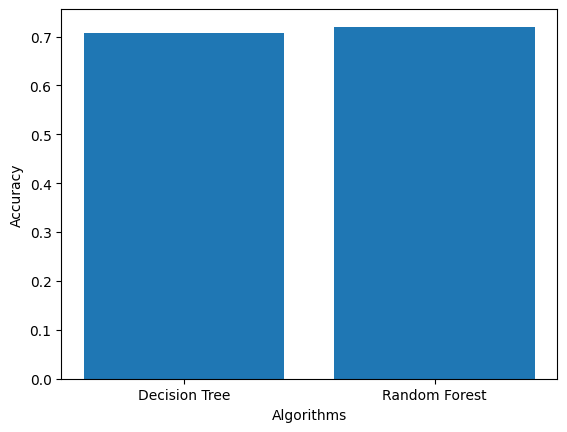

In [ ]:
plt.bar(['Decision Tree','Random Forest'],[grid_search.best_score_,grid_search2.best_score_])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
print("Test accuracy: {:.3f}".format(grid_search.best_score_))

print("Test accuracy: {:.3f}".format(grid_search2.best_score_))



Test accuracy: 0.707
Test accuracy: 0.720


# Conclusion

The purpose of this investigation was to find out if certain factors affected a student's ability to adapt towards online learning. We did this by creating a machine learning model to predict if a certain student would be more flexible towards online learning using an existing data set.

We concluded that the Random Forest classification model was a better predictor compared to the Decision Tree classification model, but by a negligible amount. (Random Forest Accuracy: 0.715, Decision Tree Accuracy: 0.707)

Usually, we would expect the Random Forest classification model to be significantly more accurate, but due to the computationally expensive use of using hyperparameter tuning on a random forest model, I had to use very limited parameters. Something I would do differently in my next investigation is to do use a dataset that uses numerical values so I can use regression models rather than classification models.

## Sources used:¶
Python and Machine Learning Courses on Datacamp.com

Introduction to Python
Intermediate Python
Supervised Learning with scikit-learn
Machine Learning with Tree-Based Models in Python

Thank you Google search for letting me know about seaborn (a cool visualization tool)


